In [1]:
from palCont import ODECont
import vegModel
from copy import copy
import numpy as np
import numdifftools as nd
%matplotlib notebook
import matplotlib.pylab as plt

In [2]:
m = vegModel.eta()

dbdt =  b*w*(-b + 1.0)*(b*e + 1.0)**2 - b
dwdt  =  -b*g*w*(b*e + 1.0)**2 - l*w/(b*r + 1.0) + p*(a*cos(omegaf*t) + 1.0)
Local Jacobian: Matrix([[2*b*e*w*(-b + 1.0)*(b*e + 1.0) - b*w*(b*e + 1.0)**2 + w*(-b + 1.0)*(b*e + 1.0)**2 - 1, b*(-b + 1.0)*(b*e + 1.0)**2], [-2*b*e*g*w*(b*e + 1.0) - g*w*(b*e + 1.0)**2 + l*r*w/(b*r + 1.0)**2, -b*g*(b*e + 1.0)**2 - l/(b*r + 1.0)]])
Linear analysis Jacobian:  Matrix([[2*b*e*w*(-b + 1.0)*(b*e + 1.0) - b*w*(b*e + 1.0)**2 - k**2 + w*(-b + 1.0)*(b*e + 1.0)**2 - 1, b*(-b + 1.0)*(b*e + 1.0)**2], [-2*b*e*g*w*(b*e + 1.0) - g*w*(b*e + 1.0)**2 + l*r*w/(b*r + 1.0)**2, -b*g*(b*e + 1.0)**2 - delta_s*k**2 - l/(b*r + 1.0)]])
Creating 1D laplacian
Laplacian created
Time to setup:  1.82591199875


In [8]:
t,sol = m.ode_integrate([0.3,0.4],p=1.0,a=0.00)

Updating parameters:
a=0.0
p=1.0


<IPython.core.display.Javascript object>


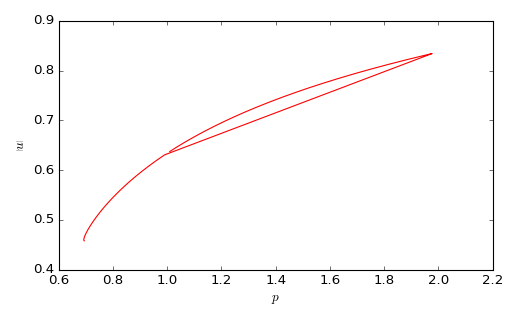

In [9]:
# Perform continuation for defined number of steps
steps = 100
import matplotlib.animation as animation
fig = plt.figure(figsize=(4*1.618,4))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
plt.xlabel(r'$p$')
plt.ylabel(r'$\left| u \right|$')
plt.tight_layout()
fig.canvas.draw()
ims = []
h = []
u = []
cont = ODECont(m,"p",sol.T[-1],m.p['p'],0.01)
for i in range(steps):
    cont.pt_type=""
    cont.step()
    h.append(cont.h_n)
    u.append(np.linalg.norm(cont.u_n))
    #plt.xlabel(r'$p$')
    #plt.ylabel(r'$\left| u \right|$')
    #plt.tight_layout()
    im1=ax.scatter(cont.h_n,np.linalg.norm(cont.u_n))
    im2,=ax.plot(h,u,'b')
    ims.append([im2])
    fig.canvas.draw()
    im1.remove()
cont = ODECont(m,"p",sol.T[-1],m.p['p'],-0.01)
for i in range(steps):
    cont.pt_type=""
    cont.step()
    h.append(cont.h_n)
    u.append(np.linalg.norm(cont.u_n))
    #plt.xlabel(r'$p$')
    #plt.ylabel(r'$\left| u \right|$')
    #plt.tight_layout()
    im1=ax.scatter(cont.h_n,np.linalg.norm(cont.u_n))
    im2,=ax.plot(h,u,'r')
    ims.append([im2])
    fig.canvas.draw()
    im1.remove()
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)
ani.save('continuation.mp4')

In [10]:
cont.sym_uh

[b, w, p]